In [1]:
# 第一个多层神经网络
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
def plot_decision_boundary(model,x,y):
    x_min,x_max= x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1,x[:,0].max()+1
    h=0.01
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z=model(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.ylabel('x1')
    plt.scatter(x[:,0],x[:,1],c=y.reshape(-1),s=40,cmap=plt.cm.Spectral)
    

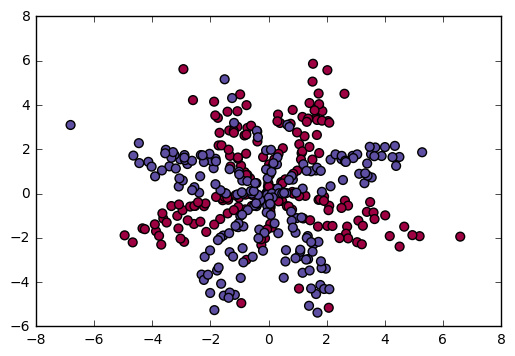

In [29]:
#处理二分类问题
np.random.seed(1)
m=400 # 样本个数
N=int(m/2) # 每一类的点的个数
D=2 # 维度
x=np.zeros((m,D))
y=np.zeros((m,1),dtype="uint8") # label 向量，0 表示红色，1 表示蓝色
a=4
for j in range(2):
    ix=range(N*j,N*(j+1))
    t=np.linspace(j*3.12,(j+1)*3.12,N)+ np.random.randn(N)*0.2
    r=a*np.sin(4*t)+np.random.randn(N)+0.2
    x[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix]=j
plt.scatter(x[:,0],x[:,1],c=y.reshape(-1),s=40,cmap=plt.cm.Spectral)

In [30]:
# 先尝试用logistic 回归
from torch import nn
x=torch.from_numpy(x).float()
y=torch.from_numpy(y).float()

w=nn.Parameter(torch.randn(2,1))
b=nn.Parameter(torch.zeros(1))

optimizer=torch.optim.SGD([w,b],1e-1)
def logistic_regression(x):
    return torch.mm(x,w)+b
criterion=nn.BCEWithLogitsLoss()

In [31]:
for e in range(100):
    out=logistic_regression(Variable(x))
    loss=criterion(out,Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e+1)%20 ==0:
        print("epoch:{}, loss:{}".format(e+1,loss.data))

epoch:20, loss:0.8890487551689148
epoch:40, loss:0.6772106885910034
epoch:60, loss:0.6750866174697876
epoch:80, loss:0.6750529408454895
epoch:100, loss:0.6750491261482239


C:\Users\cl\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\cl\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\cl\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


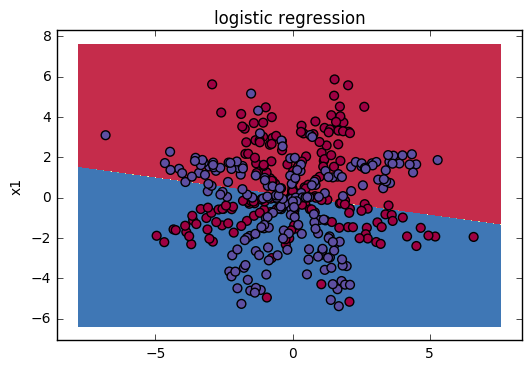

In [33]:
def plot_logistic(x):
    x=Variable(torch.from_numpy(x).float())
    out=F.sigmoid(logistic_regression(x))
    out=(out>0.5)*1
    return out.data.numpy()

plot_decision_boundary(lambda x: plot_logistic(x),x.numpy(),y.numpy())
plt.title("logistic regression")

In [39]:
# 效果不好，logistic 是一个线性分类器
# 定义两层神经网络的参数

w1=nn.Parameter(torch.randn(2,4)*0.01) # 隐藏层神经元个数2
b1=nn.Parameter(torch.zeros(4))

w2=nn.Parameter(torch.randn(4,1)*0.01)
b2=nn.Parameter(torch.zeros(1))

# 定义模型
def two_network(x):
    x1=torch.mm(x,w1)+b1
    x1=F.tanh(x1)
    x2=torch.mm(x1,w2)+b2
    return x2

optimizer=torch.optim.SGD([w1,w2,b1,b2],1.)
cirterion=nn.BCEWithLogitsLoss()

# 训练10000次

for e in  range(10000):
    out=two_network(Variable(x))
    loss=criterion(out,Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if ( e+1) % 1000==0:
        print(str(e+1),loss.data)

C:\Users\cl\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1000 tensor(0.2961)
2000 tensor(0.2751)
3000 tensor(0.2591)
4000 tensor(0.2551)
5000 tensor(0.2530)
6000 tensor(0.2516)
7000 tensor(0.2505)
8000 tensor(0.2497)
9000 tensor(0.2490)
10000 tensor(0.2484)


In [40]:
def plot_network(x):
    x=Variable(torch.from_numpy(x).float())
    x1=torch.mm(x,w1)+b1
    x1=F.tanh(x1)
    x2=torch.mm(x1,w2)+b2
    out=F.sigmoid(x2)
    out=(out>0.5)*1
    return out.data.numpy()


C:\Users\cl\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\cl\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\cl\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\cl\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a

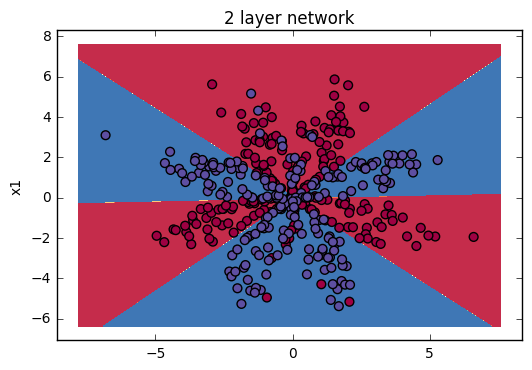

In [41]:
plot_decision_boundary(lambda x: plot_network(x),x.numpy(),y.numpy())
plt.title("2 layer network")

In [42]:
# 非线性的分类比较好


In [75]:
# Sequential 和Module
#Sequential

seq_net=nn.Sequential(
    nn.Linear(2,10), # pytorch 中的线性层
    nn.Tanh(),
    nn.Linear(10,10), # pytorch 中的线性层
    nn.Tanh(),
    nn.Linear(10,10), # pytorch 中的线性层
    nn.Tanh(),
    nn.Linear(10,1)
    
)
# 序列模块可以通过索引访问
seq_net[0] # 第一层

Linear(in_features=2, out_features=10, bias=True)

In [76]:
# 通过 parameters 获取模型的参数
param=seq_net.parameters()
# 优化器
optim=torch.optim.SGD(param,1.)
# 训练10000次

for e in range(10000):
    out=seq_net(Variable(x))
    loss=criterion(out,Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e+1)% 1000==0:
        print(str(e+1),loss.data)

1000 tensor(0.2119)
2000 tensor(0.1702)
3000 tensor(0.1358)
4000 tensor(0.1197)
5000 tensor(0.1212)
6000 tensor(0.1721)
7000 tensor(0.1012)
8000 tensor(0.1016)
9000 tensor(0.0972)
10000 tensor(0.0942)


C:\Users\cl\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\cl\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\cl\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\cl\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a

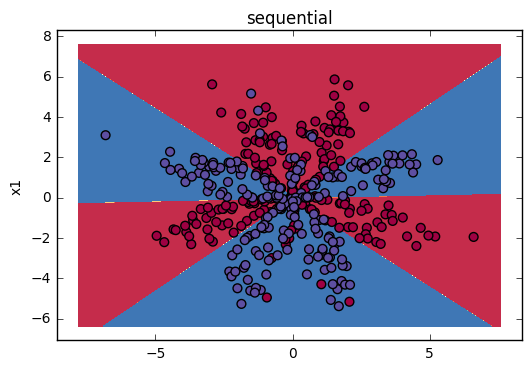

In [77]:
# 使用pytorch 的模块比我们自己写的·更稳定

def plot_seq(x):
    out=F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out=(out>0.5)*1
    return out
plot_decision_boundary(lambda x: plot_network(x),x.numpy(),y.numpy())
plt.title("sequential")

In [48]:
# pytorch 保存模型
# 将参数和模型保存在一起
torch.save(seq_net,"save_seq_net.pth")
# 读取模型
seq_net1=torch.load("save_seq_net.pth")
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [49]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[  9.6774, -10.5361],
        [  0.1291,  -4.3691],
        [  8.0169,   9.2961],
        [ -9.8708,   2.9188]], requires_grad=True)


In [55]:
# 只保存参数不保存结构
torch.save(seq_net.state_dict(),"save_seq_net_params.pth")
#要读入参数，需要重新定义一次模型。
seq_net2=nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)

)

seq_net2.load_state_dict(torch.load("save_seq_net_params.pth"))

In [56]:
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [57]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[  9.6774, -10.5361],
        [  0.1291,  -4.3691],
        [  8.0169,   9.2961],
        [ -9.8708,   2.9188]], requires_grad=True)


In [63]:
#(2) model 模型,灵活，任何复杂的操作都可以直观的在forward 中执行
class module_net(nn.Module):
    def __init__(self,num_input,num_hidden,num_output):
        super(module_net,self).__init__()
        self.layer1=nn.Linear(num_input,num_hidden)
        self.layer2=nn.Tanh()
        self.layer3=nn.Linear(num_hidden,num_output)
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        return x
    
    


In [64]:
mo_net=module_net(2,4,1)

In [ ]:
# 访问模型中的某一层可以直接通过名字

In [65]:
l1=mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [66]:
# 第一层的权重
print(l1.weight)

Parameter containing:
tensor([[ 0.5327, -0.5631],
        [ 0.4403,  0.5858],
        [-0.1426, -0.1209],
        [ 0.3756, -0.0018]], requires_grad=True)


In [67]:
# 定义优化器
optim=torch.optim.SGD(mo_net.parameters(),1)
for e in range(10000):
    out=mo_net(Variable(x))
    loss=criterion(out,Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e+1)% 1000==0:
        print(str(e+1),loss.data)

1000 tensor(0.2961)
2000 tensor(0.2851)
3000 tensor(0.2797)
4000 tensor(0.2766)
5000 tensor(0.2745)
6000 tensor(0.2730)
7000 tensor(0.2718)
8000 tensor(0.2709)
9000 tensor(0.2700)
10000 tensor(0.2681)


In [68]:
# 保存模型
torch.save(mo_net.state_dict(),"mudule_net.pth")